In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [2]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [3]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [4]:
from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [25]:
tweet_response_ethereum = bearer_token.search_tweets(query='ethereum', max_results=100)

ethereum_tweet_data = tweet_response_ethereum.data

In [27]:
for tweet in ethereum_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

@DOMIVAKERO 🔥Hot Offer🔥 
 
HPPY Jellyfish #47 
Price: 0.0025 #ETH Just for a few hours🤯 
#Ethereum Blockchain 
 
https://t.co/ig9jZm914I 
 #NFTCommunity #NFTs #NFTshill #opensea #NFTdrop #NFTs
2022-04-14 18:09:13
@DelCrxpto @aesthetics_d 
#Clockx24 #UTK #Ethereum https://t.co/VBW3sG014K
2022-04-14 18:09:13
RT @GrumpyBearTC: Are you ready for some big news? 
Stay tuned!
#nfts #nft #nftart #nftcommunity #nftcollector #nftartist #crypto #digitala…
2022-04-14 18:09:13
#ethaxcrypto #ethaxtoken #DEX #cryptocurrency #Ethereum #BinanceSmartChain #Bitcoin
Telegram: https://t.co/kcmdjb40t8 https://t.co/a5IQA7pmGr
2022-04-14 18:09:12
RT @R_chronicls: The time has come! Join our Discord! 
https://t.co/t6FjsHHNbX

#reptilechronicles #reptile #opensea #ethereum #nftdrop #nf…
2022-04-14 18:09:12
No more red candles for SHIBA.... always Green --&gt; BULLISH forever. #shiba #shib #ethereum #axs #kava #solana #avax #btc https://t.co/jlmipYBKFY
2022-04-14 18:09:12
RT @whale_alert: 🔥 🔥 🔥 🔥 🔥  47,675,563 #

In [8]:
ethereum_df = pd.DataFrame(ethereum_tweet_data)
ethereum_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,1514514814277931019,RT @DailyAvax: 1⃣ #AVAX #Giveaway\n\n▶️Follow ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1514514812948172800,$0.43.\nTelegram Channel = Jasmine Crypto Prem...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1514514812235132930,close this ALPHA short. Taking an additional ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1514514811148804096,Pierre_crypt0#1140 H4 close above but as BTC s...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1514514808854306820,RT @AAArtistry: How sick would this look in yo...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1514514579883270147,@Pedicco @RemiPromotes \n#Clockx24 #UTK #Ether...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,1514514573746970626,Well! This is pretty big news! #btc #bitcoin #...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,1514514570190077953,RT @R_chronicls: The time has come! Join our D...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,1514514569946873860,Yesterday I had only 10 #btc... Today 100.000 ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
ethereum_df_text = ethereum_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang','id'],
                                   axis=1)
ethereum_df_text

,text
0,RT @DailyAvax: 1⃣ #AVAX #Giveaway\n\n▶️Follow ...
1,$0.43.\nTelegram Channel = Jasmine Crypto Prem...
2,close this ALPHA short. Taking an additional ...
3,Pierre_crypt0#1140 H4 close above but as BTC s...
4,RT @AAArtistry: How sick would this look in yo...
...,...
95,@Pedicco @RemiPromotes \n#Clockx24 #UTK #Ether...
96,Well! This is pretty big news! #btc #bitcoin #...
97,RT @R_chronicls: The time has come! Join our D...
98,Yesterday I had only 10 #btc... Today 100.000 ...


In [10]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [11]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

ethereum_df_text = ethereum_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
ethereum_df_text.head(20)

,text
0,RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...
1,043 Telegram Channel Jasmine Crypto Premium I...
2,close ALPHA short Taking additional risk keepi...
3,Pierrecrypt140 H4 close but BTC still hasnt ab...
4,RT AAArtistry How sick would look collection ...
5,043 Telegram Channel Jasmine Crypto Premium I...
6,close ALPHA short Taking additional risk keepi...
7,Pierrecrypt140 H4 close but BTC still hasnt ab...
8,Ethereum Merge few months after June Dev clear...
9,AtlanticApes httpstconxfNNc2l5P 042 ETH nft nf...


In [13]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df_text = ethereum_df_text.join(text_sentiment_df)

In [14]:
ethereum_df_text.head(50)

,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...,0.4767,0.140,0.860,0.000,1
1,043 Telegram Channel Jasmine Crypto Premium I...,0.0000,0.000,1.000,0.000,0
2,close ALPHA short Taking additional risk keepi...,-0.7184,0.000,0.788,0.212,-1
3,Pierrecrypt140 H4 close but BTC still hasnt ab...,-0.3612,0.000,0.921,0.079,-1
4,RT AAArtistry How sick would look collection ...,-0.5106,0.000,0.680,0.320,-1
5,043 Telegram Channel Jasmine Crypto Premium I...,0.0000,0.000,1.000,0.000,0
6,close ALPHA short Taking additional risk keepi...,-0.7184,0.000,0.788,0.212,-1
7,Pierrecrypt140 H4 close but BTC still hasnt ab...,-0.3612,0.000,0.921,0.079,-1
8,Ethereum Merge few months after June Dev clear...,0.0772,0.115,0.885,0.000,1
9,AtlanticApes httpstconxfNNc2l5P 042 ETH nft nf...,0.0000,0.000,1.000,0.000,0


In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [16]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

ethereum_df_text['token_text'] = ethereum_df_text.text.apply(tokenizer)
ethereum_df_text

,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...,0.4767,0.140,0.860,0.000,1,"[RT, DailyAvax1, AVAX, Giveaway, Follow, Daily..."
1,043 Telegram Channel Jasmine Crypto Premium I...,0.0000,0.000,1.000,0.000,0,"[043, Telegram, Channel, Jasmine, Crypto, Prem..."
2,close ALPHA short Taking additional risk keepi...,-0.7184,0.000,0.788,0.212,-1,"[close, ALPHA, short, Taking, additional, risk..."
3,Pierrecrypt140 H4 close but BTC still hasnt ab...,-0.3612,0.000,0.921,0.079,-1,"[Pierrecrypt140, H4, close, BTC, still, hasnt,..."
4,RT AAArtistry How sick would look collection ...,-0.5106,0.000,0.680,0.320,-1,"[RT, AAArtistry, How, sick, would, look, colle..."
...,...,...,...,...,...,...,...
95,Pedicco RemiPromotes Clockx24 UTK Ethereum htt...,0.0000,0.000,1.000,0.000,0,"[Pedicco, RemiPromotes, Clockx24, UTK, Ethereu..."
96,Well This pretty big news btc bitcoin ethereum...,0.6486,0.346,0.654,0.000,1,"[Well, This, pretty, big, news, btc, bitcoin, ..."
97,RT Rchronicls The time come Join Discord https...,-0.1280,0.130,0.710,0.160,-1,"[RT, Rchronicls, The, time, come, Join, Discor..."
98,Yesterday I10 btc Today100000 YEAH bitcoin eth...,0.4466,0.268,0.732,0.000,1,"[Yesterday, I10, btc, Today100000, YEAH, bitco..."


In [18]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: stemming_on_text(x))
ethereum_df_text['text'].head()

0    RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...
1    043 Telegram Channel  Jasmine Crypto Premium I...
2    close ALPHA short Taking additional risk keepi...
3    Pierrecrypt140 H4 close but BTC still hasnt ab...
4    RT AAArtistry How sick would look collection  ...
Name: text, dtype: object

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_bitcoin = ethereum_df_text['token_text']
token_text_df_bitcoin

0     [RT, DailyAvax1, AVAX, Giveaway, Follow, Daily...
1     [043, Telegram, Channel, Jasmine, Crypto, Prem...
2     [close, ALPHA, short, Taking, additional, risk...
3     [Pierrecrypt140, H4, close, BTC, still, hasnt,...
4     [RT, AAArtistry, How, sick, would, look, colle...
                            ...                        
95    [Pedicco, RemiPromotes, Clockx24, UTK, Ethereu...
96    [Well, This, pretty, big, news, btc, bitcoin, ...
97    [RT, Rchronicls, The, time, come, Join, Discor...
98    [Yesterday, I10, btc, Today100000, YEAH, bitco...
99    [VerfiedAirdrop, good, Ali786UK, Amir674112, m...
Name: token_text, Length: 100, dtype: object

In [20]:
ethereum_df_text = ' '.join(str(e) for e in token_text_df_bitcoin)
ethereum_df_text

"['RT', 'DailyAvax1', 'AVAX', 'Giveaway', 'Follow', 'DailyAvax', 'Rt', 'amp', 'amp', 'Tag', 'friend', '48', 'Hours', 'Avalanche', 'BTC', 'ETH', 'Crypto', 'NFTs', 'NFT', 'Giveaw'] ['043', 'Telegram', 'Channel', 'Jasmine', 'Crypto', 'Premium', 'IOST', 'IOST', 'MXC', 'MXC', 'Solana', 'SOL', 'GreenSatoshiToken', 'GST', 'Ethereum', 'ETH', '3of3'] ['close', 'ALPHA', 'short', 'Taking', 'additional', 'risk', 'keeping', 'Ill', 'update', 'I', 'cut', 'SL', 'unchanged', 'Telegram', 'Channel', 'Jasmine', 'Crypto', 'Premium', 'IOST', 'IOST', 'MXC', 'MXC', 'Solana', 'SOL', 'GreenSatoshiToken', 'GST', 'Ethereum', 'ETH', '2of3'] ['Pierrecrypt140', 'H4', 'close', 'BTC', 'still', 'hasnt', 'able', 'break', 'flip', 'H4', 'trend', 'Im', 'hesitant', 'Telegram', 'Channel', 'Jasmine', 'Crypto', 'Premium', 'IOST', 'IOST', 'MXC', 'MXC', 'Solana', 'SOL', 'GreenSatoshiToken', 'GST', 'Ethereum', 'ETH1of3', 'httpstcomoHMeB76Sd'] ['RT', 'AAArtistry', 'How', 'sick', 'would', 'look', 'collection', 'httpstco8MJkDmBxLw']

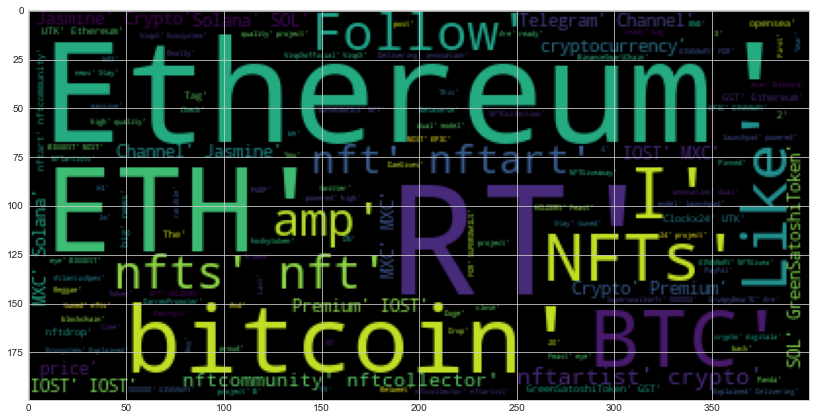

In [21]:
wc = WordCloud().generate(ethereum_df_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)